In [7]:
import numpy as np
from matplotlib import pyplot
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from matplotlib import pyplot as plt
from sklearn.svm import SVC # "Support vector classifier"


In [2]:
# Importing the dataset
df = pd.read_csv("phishing_dataset.csv")
df.pop("id")
df.pop("RightClick")
df.pop("Iframe")
df.pop("on_mouseover")
df.pop("Favicon")
df["Result"].replace(-1, 0, inplace=True)
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,...,Redirect,popUpWidnow,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,0,1,-1,-1,-1,-1,1,1,-1,0
1,1,1,1,1,1,-1,0,1,-1,1,...,0,1,-1,-1,0,-1,1,1,1,0
2,1,0,1,1,1,-1,-1,-1,-1,1,...,0,1,1,-1,1,-1,1,0,-1,0
3,1,0,1,1,1,-1,-1,-1,1,1,...,0,1,-1,-1,1,-1,1,-1,1,0
4,1,0,-1,1,1,-1,1,1,-1,1,...,0,-1,-1,-1,0,-1,1,1,1,1


In [3]:
# Separating the data into X and y
logistic_df = df.copy(deep=True)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
# Splitting the dataset into the Training set, Validation set and Test set

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y,   
    test_size = 0.07, random_state=10, shuffle=True
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, 
    test_size = 0.07, random_state=10, shuffle=True
)

y_2d_train= y_train.reshape(-1, 1)
y_2d_test = y_test.reshape(-1, 1)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
print('X_train:' + str(X_train.shape))
print('y_train:' + str(y_train.shape))
print('X_val: \t'  + str(X_val.shape))
print('y_val: \t'  + str(y_val.shape))
print('X_test: '  + str(X_test.shape))
print('y_test: '  + str(y_test.shape))

X_train:(9561, 26)
y_train:(9561,)
X_val: 	(720, 26)
y_val: 	(720,)
X_test: (774, 26)
y_test: (774,)


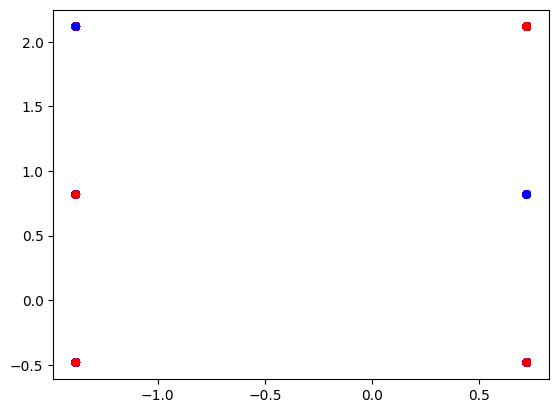

In [6]:
clf_ob = SVC(kernel="linear", C=1).fit(X_train, y_train))

plt.scatter(X_train[:,0], X_train[:,1], c=np.where(y_train==1,'red','blue'), s = 10,linewidth = 3);